# Проект рекомендательная модель для интернет-магазина
## Описание проекта

### Бизнес окружение
Ссылка на репозитарий:
https://github.com/Denis1gn/portfolio/tree/main/%D0%A0%D0%B5%D0%BA%D0%BE%D0%BC%D0%B5%D0%BD%D0%B4%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C 
- Интернет-магазин продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. 
- Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться
- Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории.

### Бизнес задача
- Отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

- Дополнение для коммита №2.

- Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

__Нужно собрать данные по клиентам по следующим группам:__
1. Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
2. Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
3. Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
4. Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
5. Представим группы признаков (вместе с целевым) в виде диаграммы — такую визуализацию ещё называют диаграммой Исикавы.

- Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
- В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
- Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения


### План работы

- Шаг 1. Загрузка и изучение данных
- Шаг 2. Предобработка данных
- Шаг 3. Исследовательский анализ данных
- Шаг 4. Объединение таблиц
- Шаг 5. Корреляционный анализ признаков 
- Шаг 6. Использование пайплайнов
- Шаг 7. Анализ важности признаков
- Шаг 8. Сегментация покупателей
- Шаг 9. Вывод

## Загрузка, изучение и предобработка данных

### Установка и загрузка библиотек

In [4]:
#загрузка библиотек для работы с данными
import numpy as np
import pandas as pd

#загрузка библиотек для анализа корреляции
import phik

#загрузка библиотек для работы с графиками
import matplotlib.pyplot as plt
import seaborn as sns

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (OneHotEncoder, 
                                   LabelEncoder, 
                                   StandardScaler, 
                                   MinMaxScaler, 
                                   RobustScaler)
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import (roc_auc_score,
                             accuracy_score)


# импортируем класс RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#загружаем модуль проверки признаков
import shap

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

In [6]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

### Изучение данных

#### Изучение таблицы market_file

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.


In [7]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [8]:
market_file.head(5)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


- __id__ — номер покупателя в корпоративной базе данных.
- __Покупательская активность__ — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- __Тип сервиса__ — уровень сервиса, например «премиум» и «стандарт».
- __Разрешить сообщать__ — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- __Маркет_актив_6_мес__ — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- __Маркет_актив_тек_мес__ — количество маркетинговых коммуникаций в текущем месяце.
- __Длительность__ — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- __Акционные_покупки__ — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- __Популярная_категория__ — самая популярная категория товаров у покупателя за последние 6 месяцев.
- __Средний_просмотр_категорий_за_визит__ — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- __Неоплаченные_продукты_штук_квартал__ — общее число неоплаченных товаров в корзине за последние 3 месяца.
- __Ошибка_сервиса__ — число сбоев, которые коснулись покупателя во время посещения сайта.
- __Страниц_за_визит__ — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

#### Изучение таблицы market_money


Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

In [9]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [10]:
market_money.head(5)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


- __id__ — номер покупателя в корпоративной базе данных.
- __Период__ — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- __Выручка__ — сумма выручки за период.

#### Изучение таблицы market_time

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

In [11]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [12]:
market_time.head(5)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


- __id__ — номер покупателя в корпоративной базе данных.
- __Период__ — название периода, во время которого зафиксировано общее время.
- __минут__ — значение времени, проведённого на сайте, в минутах.

#### Изучение таблицы money

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

In [13]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [14]:
money.head(5)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


- __id__ — номер покупателя в корпоративной базе данных.
- __Прибыль__ — значение прибыли.

### Предобработка данных
#### Поиск пропусков и дупликатов

In [15]:
#Проверка на отсутствие пропусков и дупликатов
print('Пропуски в строках таблицы market_file')
display(pd.DataFrame(round(market_file.isna().mean()*100,))
        .style.background_gradient('coolwarm'))
print('Дупликаты market_file', market_file.duplicated().sum())

Пропуски в строках таблицы market_file


,0
id,0.000000
Покупательская активность,0.000000
Тип сервиса,0.000000
Разрешить сообщать,0.000000
Маркет_актив_6_мес,0.000000
Маркет_актив_тек_мес,0.000000
Длительность,0.000000
Акционные_покупки,0.000000
Популярная_категория,0.000000
Средний_просмотр_категорий_за_визит,0.000000


Дупликаты market_file 0


In [16]:
#Проверка на отсутствие пропусков и дупликатов
print('Пропуски в строках таблицы market_money')
display(pd.DataFrame(round(market_money.isna().mean()*100,))
        .style.background_gradient('coolwarm'))
print('Дупликаты market_money', market_money.duplicated().sum())

Пропуски в строках таблицы market_money


,0
id,0.000000
Период,0.000000
Выручка,0.000000


Дупликаты market_money 0


In [17]:
#Проверка на отсутствие пропусков и дупликатов
print('Пропуски в строках таблицы market_time')
display(pd.DataFrame(round(market_time.isna().mean()*100,))
        .style.background_gradient('coolwarm'))
print('Дупликаты market_time', market_time.duplicated().sum())

Пропуски в строках таблицы market_time


,0
id,0.000000
Период,0.000000
минут,0.000000


Дупликаты market_time 0


In [18]:
#Проверка на отсутствие пропусков и дупликатов
print('Пропуски в строках таблицы money')
display(pd.DataFrame(round(money.isna().mean()*100,))
        .style.background_gradient('coolwarm'))
print('Дупликаты money', money.duplicated().sum())

Пропуски в строках таблицы money


,0
id,0.000000
Прибыль,0.000000


Дупликаты money 0


#### Изучение неявных дупликатов категорийных данных

In [19]:
mf_obj_cols = market_file.select_dtypes(exclude='number').columns.tolist()
print('Категорийные данные market_file:', mf_obj_cols)

Категорийные данные market_file: ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']


In [20]:
for col in mf_obj_cols:
    if col != 'id':
        print()
        print('Признак', col)
        print(market_file[col].value_counts())


Признак Покупательская активность
Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64

Признак Тип сервиса
стандарт     914
премиум      376
стандартт     10
Name: Тип сервиса, dtype: int64

Признак Разрешить сообщать
да     962
нет    338
Name: Разрешить сообщать, dtype: int64

Признак Популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64


In [21]:
market_time['Период'].value_counts()

предыдцщий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

In [22]:
market_money['Период'].value_counts()

предыдущий_месяц       1300
текущий_месяц          1300
препредыдущий_месяц    1300
Name: Период, dtype: int64

#### Переименование категорийных данных

In [23]:
#Исправим неявный дубликат в столбце Тип сервиса
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace({'стандартт':'стандарт'})
market_file['Тип сервиса'].value_counts()

стандарт    924
премиум     376
Name: Тип сервиса, dtype: int64

In [24]:
#Исправим неявный дубликат в столбце Тип сервиса
market_time['Период'] = market_time['Период'].replace({'предыдцщий_месяц':'предыдущий_месяц'})
market_time['Период'].value_counts()

предыдущий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

#### Изменение типов данных

In [25]:
market_file['id'] = market_file['id'].astype(object)
market_money['id'] = market_money['id'].astype(object)
market_time['id'] = market_time['id'].astype(object)
money['id'] = money['id'].astype(object)

### Итоги раздела

- Загружены четыре таблицы. 
- Проведена проверка на дубликаты, неявные дубликаты и отсутствующие данные. 
- Исправлены опечатки в категорийных данных
- Изменен тип данных идентификаторов на object

## Исследовательский анализ данных 

Итоговая задача раздела, отбрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. 

### Исследование данных таблицы market_file

In [26]:
mf_num_cols = market_file.select_dtypes(exclude='object').columns.tolist()
print('Количественные данные market_file:', mf_num_cols)

Количественные данные market_file: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит']


#### Исследование количественных данных

- __Маркет актив 6 мес__ -  среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: Маркет_актив_6_мес, dtype: float64


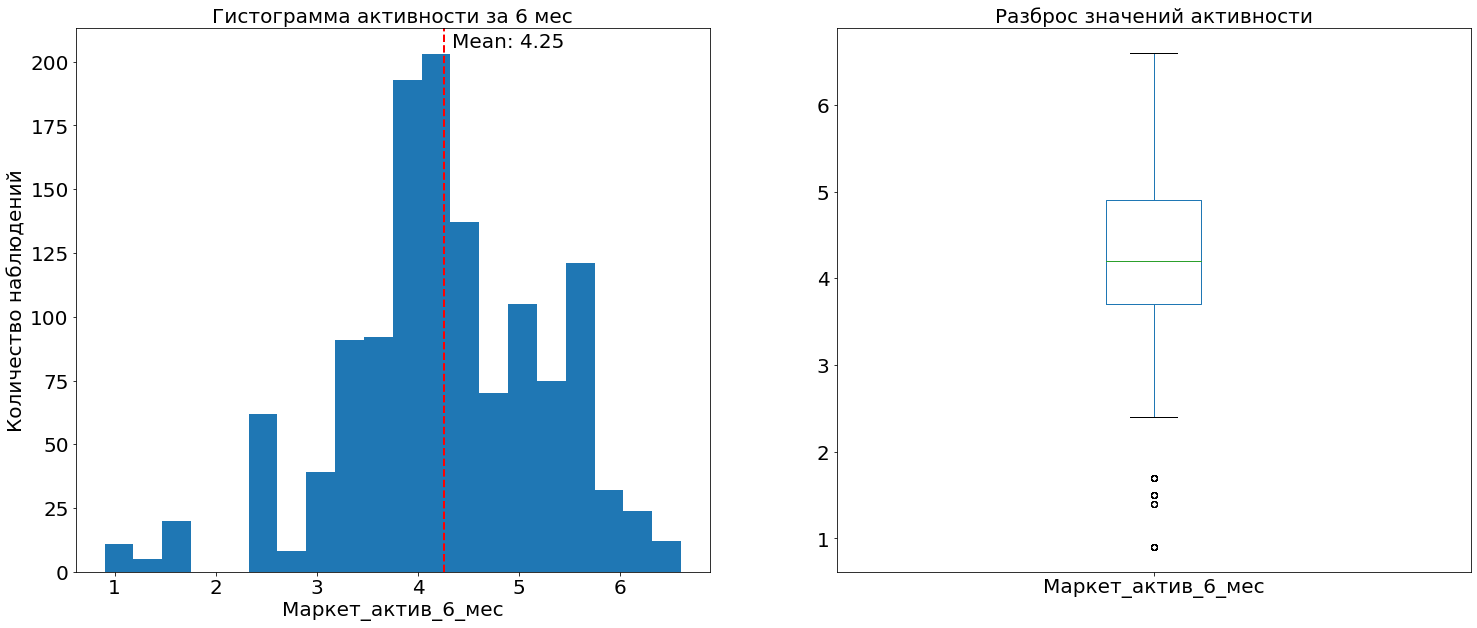

In [27]:
#Описание
print(market_file['Маркет_актив_6_мес'].describe())

#Графики
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
market_file['Маркет_актив_6_мес'].plot(kind='hist', bins = 20, ax=axes[0], fontsize=20)
axes[0].axvline(market_file['Маркет_актив_6_мес'].mean(), color='red', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Маркет_актив_6_мес', size=20)
axes[0].set_ylabel('Количество наблюдений', size=20)
axes[0].set_title('Гистограмма активности за 6 мес', size=20)

min_ylim, max_ylim = plt.ylim()
axes[0].text(market_file['Маркет_актив_6_мес'].mean()*1.15, max_ylim*208, 
             'Mean: {:.2f}'.format(market_file['Маркет_актив_6_мес'].mean()), 
             fontsize=20, verticalalignment='center', horizontalalignment='center')

market_file['Маркет_актив_6_мес'].plot(kind='box', ax=axes[1], fontsize = 20)
axes[1].set_title('Разброс значений активности', size=20)
plt.show()

In [28]:
print('Число записей с показателем маркетинговой активности за 6 месяцев менее двух:', 
      market_file[market_file['Маркет_актив_6_мес'] < 2].shape[0])

Число записей с показателем маркетинговой активности за 6 месяцев менее двух: 36


__Вывод:__ Мы наблюдаем, что в среднем пользователи получили 4.25 маркетинговых коммуникаций за 6 месяцев, где показатель менее 2-ух коммуникаций является выбросом статистики, что прослеживается для 36 наблюдений.

- __Маркет_актив_тек_мес__ — количество маркетинговых коммуникаций в текущем месяце.

4    669
5    323
3    308
Name: Маркет_актив_тек_мес, dtype: int64


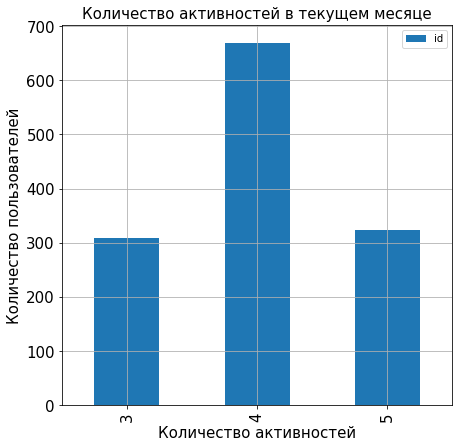

In [29]:
print(market_file['Маркет_актив_тек_мес'].value_counts())

(
    market_file
    .pivot_table(index='Маркет_актив_тек_мес', values='id', aggfunc='count')
    .plot(kind ='bar', grid=True, figsize=(7, 7), fontsize=15)
) 
plt.title('Количество активностей в текущем месяце', fontsize=15)
plt.xlabel('Количество активностей', fontsize=15)
plt.ylabel('Количество пользователей', fontsize=15)
plt.legend(loc = 'best')
plt.show()

__Вывод:__ В текущем месяце, в большинстве случаев на одного клиента направлено 4 маркетинговые коммуникации. При этом направлялось от 3 до 5.

- __Длительность__ — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: Длительность, dtype: float64


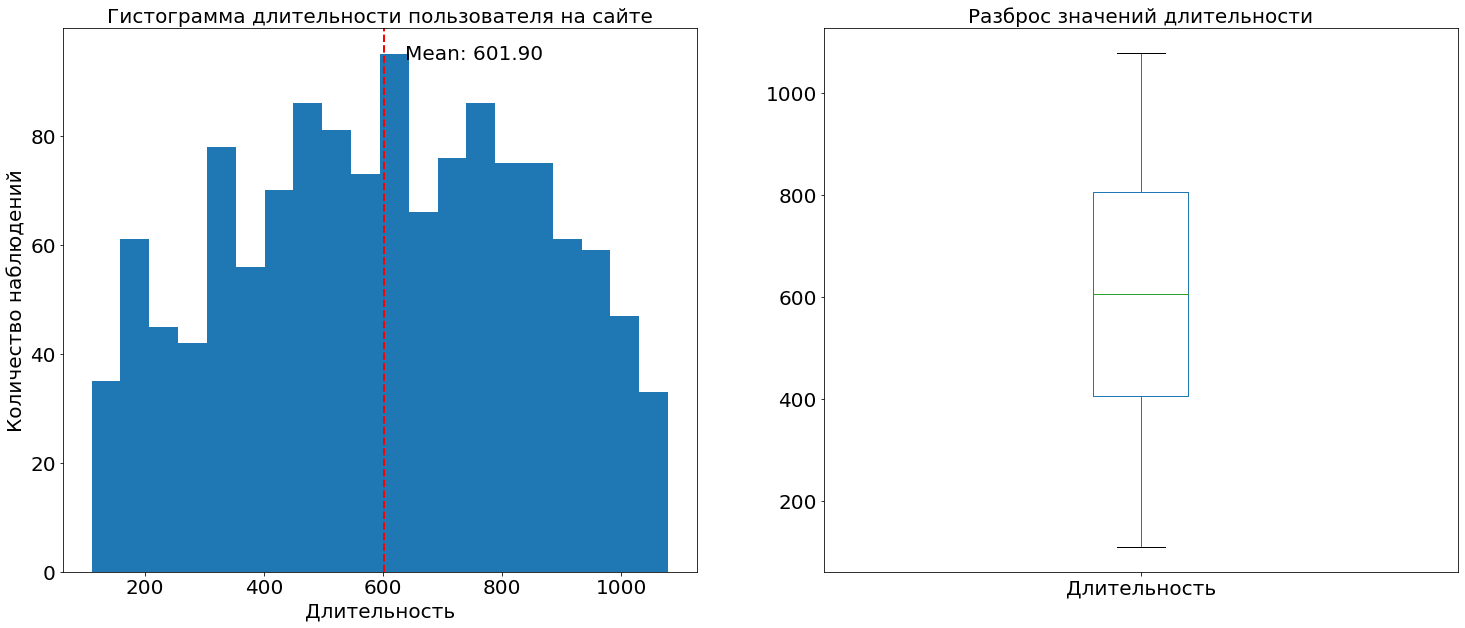

In [30]:
#Описание
print(market_file['Длительность'].describe())

#Графики
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
market_file['Длительность'].plot(kind='hist', bins = 20, ax=axes[0], fontsize=20)
axes[0].axvline(market_file['Длительность'].mean(), color='red', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Длительность', size=20)
axes[0].set_ylabel('Количество наблюдений', size=20)
axes[0].set_title('Гистограмма длительности пользователя на сайте', size=20)

min_ylim, max_ylim = plt.ylim()
axes[0].text(market_file['Длительность'].mean()*1.25, max_ylim*95, 
             'Mean: {:.2f}'.format(market_file['Длительность'].mean()), 
             fontsize=20, verticalalignment='center', horizontalalignment='center')

market_file['Длительность'].plot(kind='box', ax=axes[1], fontsize = 20)
axes[1].set_title('Разброс значений длительности', size=20)
plt.show()

__Вывод:__ среднее значение длительности нахождения на сайте после регистрации - 600 дней, при этом лишь менее 25% наблюдений находится на сайте менее года

- __Акционные_покупки__ — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: Акционные_покупки, dtype: float64


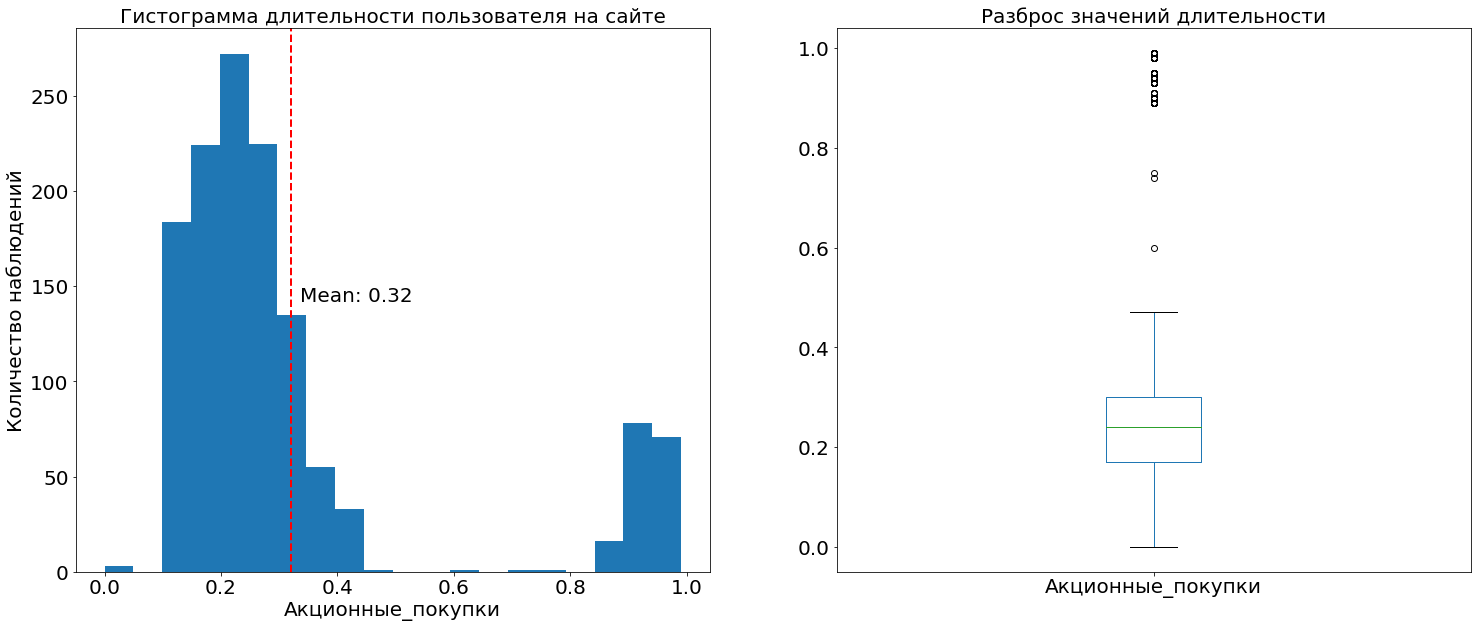

In [31]:
#Описание
print(market_file['Акционные_покупки'].describe())

#Графики
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
market_file['Акционные_покупки'].plot(kind='hist', bins = 20, ax=axes[0], fontsize=20)
axes[0].axvline(market_file['Акционные_покупки'].mean(), color='red', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Акционные_покупки', size=20)
axes[0].set_ylabel('Количество наблюдений', size=20)
axes[0].set_title('Гистограмма длительности пользователя на сайте', size=20)

min_ylim, max_ylim = plt.ylim()
axes[0].text(market_file['Акционные_покупки'].mean()*1.35, max_ylim*145, 
             'Mean: {:.2f}'.format(market_file['Акционные_покупки'].mean()), 
             fontsize=20, verticalalignment='center', horizontalalignment='center')

market_file['Акционные_покупки'].plot(kind='box', ax=axes[1], fontsize = 20)
axes[1].set_title('Разброс значений длительности', size=20)
plt.show()

In [32]:
print('Наблюдений с долей акционных покупок менее 0.32:', market_file[market_file['Акционные_покупки']<0.32].shape[0])
print('Наблюдений с долей акционных покупок более 0.32:', market_file[market_file['Акционные_покупки']>0.32].shape[0])

Наблюдений с долей акционных покупок менее 0.32: 1003
Наблюдений с долей акционных покупок более 0.32: 277


__Вывод:__ Возможно определить границу потребления акционных товаров в размере одной трети покупок. Порядка 1000 наблюдений имеют менее трети акционных покупок в корзине, более трети поряда 277. 

- __Средний_просмотр_категорий_за_визит__ — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

3    356
2    312
4    263
5    177
1    106
6     86
Name: Средний_просмотр_категорий_за_визит, dtype: int64


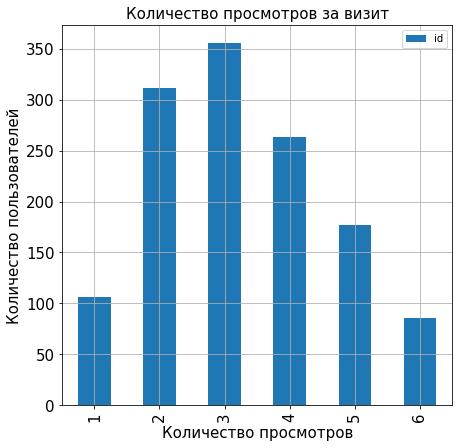

In [33]:
#Описание
print(market_file['Средний_просмотр_категорий_за_визит'].value_counts())

#Графики
(
    market_file
    .pivot_table(index='Средний_просмотр_категорий_за_визит', values='id', aggfunc='count')
    .plot(kind ='bar', grid=True, figsize=(7, 7), fontsize=15)
) 
plt.title('Количество просмотров за визит', fontsize=15)
plt.xlabel('Количество просмотров', fontsize=15)
plt.ylabel('Количество пользователей', fontsize=15)
plt.legend(loc = 'best')
plt.show()

__Вывод:__ 3 категории за визит - мода просмотров среди пользователей.

- __Неоплаченные_продукты_штук_квартал__ — общее число неоплаченных товаров в корзине за последние 3 месяца.

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64


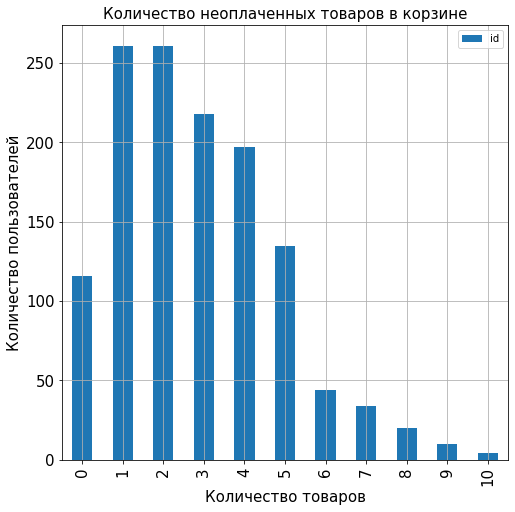

In [34]:
#Описание
print(market_file['Неоплаченные_продукты_штук_квартал'].describe())

#График
(
    market_file
    .pivot_table(index='Неоплаченные_продукты_штук_квартал', values='id', aggfunc='count')
    .plot(kind ='bar', grid=True, figsize=(8,8), fontsize=15)
) 
plt.title('Количество неоплаченных товаров в корзине', fontsize=15)
plt.xlabel('Количество товаров', fontsize=15)
plt.ylabel('Количество пользователей', fontsize=15)
plt.legend(loc = 'best')
plt.show()

__Вывод:__ 2-3 неоплаченных товара в корзине наиболее встречающиеся значения среди пользователей

- __Ошибка_сервиса__ — число сбоев, которые коснулись покупателя во время посещения сайта.

Частота значений
4    257
3    226
5    208
2    189
6    156
7     92
1     74
8     66
0     17
9     15
Name: Ошибка_сервиса, dtype: int64

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: Ошибка_сервиса, dtype: float64


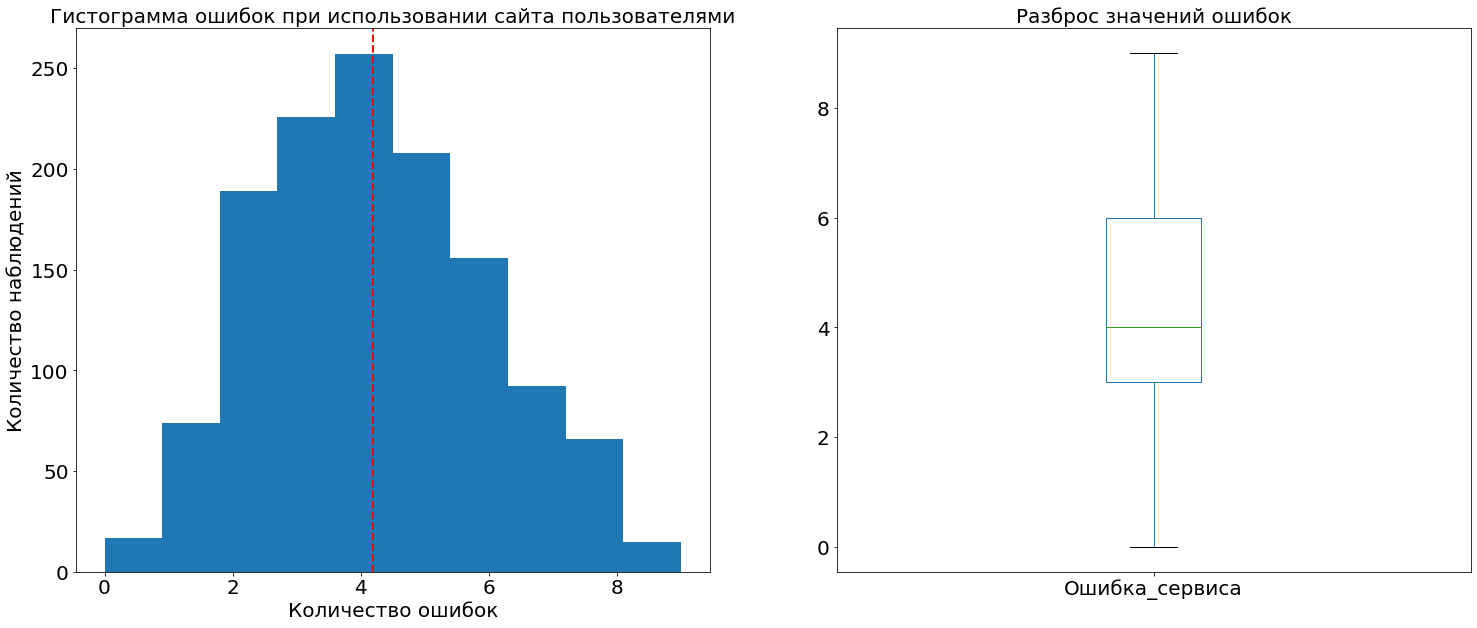

In [35]:
#Описание
print('Частота значений')
print(market_file['Ошибка_сервиса'].value_counts())
print()
print(market_file['Ошибка_сервиса'].describe())

#Графики
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
market_file['Ошибка_сервиса'].plot(kind='hist', bins = 10, ax=axes[0], fontsize=20)
axes[0].axvline(market_file['Ошибка_сервиса'].mean(), color='red', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Количество ошибок', size=20)
axes[0].set_ylabel('Количество наблюдений', size=20)
axes[0].set_title('Гистограмма ошибок при использовании сайта пользователями', size=20)


market_file['Ошибка_сервиса'].plot(kind='box', ax=axes[1], fontsize = 20)
axes[1].set_title('Разброс значений ошибок', size=20)
plt.show()

__Вывод:__ Ошибки нормально распределены, в среднем на пользователя приходится 4 ошибки 

- __Страниц_за_визит__ — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

Частота значений
6     127
5     115
4     112
8     109
9     108
10    104
7     102
11     92
3      76
12     73
13     61
2      58
14     53
15     36
16     21
1      20
17     19
18      7
19      5
20      2
Name: Страниц_за_визит, dtype: int64

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: Страниц_за_визит, dtype: float64


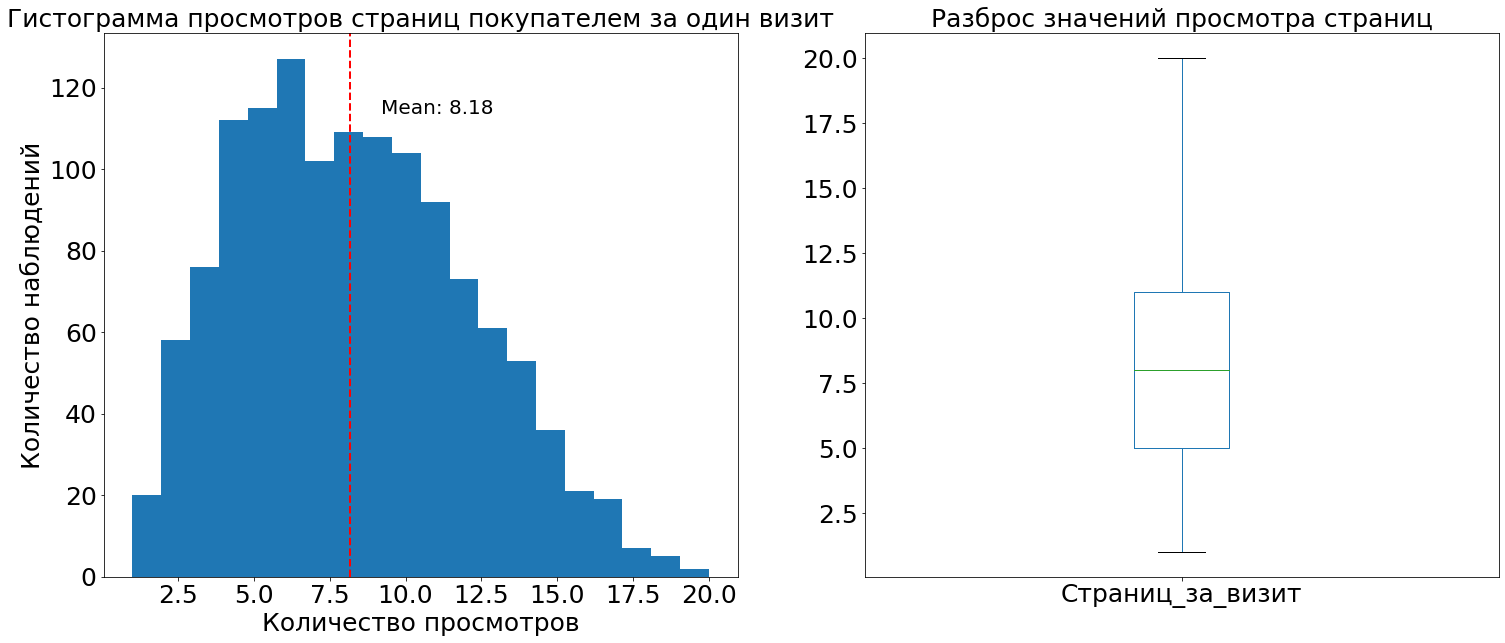

In [36]:
#Описание
print('Частота значений')
print(market_file['Страниц_за_визит'].value_counts())
print()
print(market_file['Страниц_за_визит'].describe())

#Графики
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
market_file['Страниц_за_визит'].plot(kind='hist', bins = 20, ax=axes[0], fontsize=25)
axes[0].axvline(market_file['Страниц_за_визит'].mean(), color='red', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Количество просмотров', size=25)
axes[0].set_ylabel('Количество наблюдений', size=25)
axes[0].set_title('Гистограмма просмотров страниц покупателем за один визит', size=25)

min_ylim, max_ylim = plt.ylim()
axes[0].text(market_file['Страниц_за_визит'].mean()*1.35, max_ylim*115, 
             'Mean: {:.2f}'.format(market_file['Страниц_за_визит'].mean()), 
             fontsize=20, verticalalignment='center', horizontalalignment='center')


market_file['Страниц_за_визит'].plot(kind='box', ax=axes[1], fontsize = 25)
axes[1].set_title('Разброс значений просмотра страниц', size=25)
plt.show()

__Вывод:__  Средний показатель просмотра страниц за один визит равен 8.

#### Исследование категорийных данных

In [37]:
mf_obj_cols = market_file.select_dtypes(exclude='number').columns.tolist()
print('Категорийные данные market_file:', mf_obj_cols)

Категорийные данные market_file: ['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']


- __Покупательская активность__ — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».

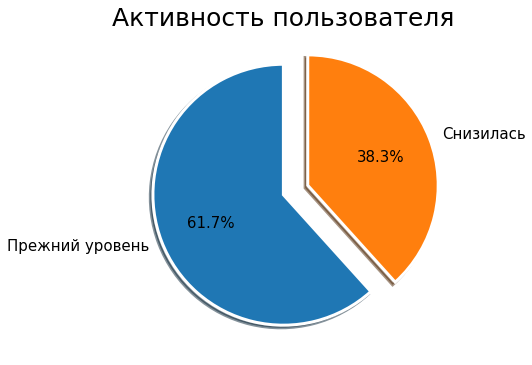

Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64

In [38]:
labels = market_file['Покупательская активность'].value_counts().index.tolist()
sizes = market_file['Покупательская активность'].value_counts().tolist()
explode = [0, 0.2]
textprops = {"fontsize":15}

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Активность пользователя', fontsize=25)
ax.pie(sizes, explode=explode, labels=labels, 
       autopct='%1.1f%%', shadow=True, startangle=90, 
       radius = 1, textprops =textprops, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.show()

market_file['Покупательская активность'].value_counts()

__Вывод:__ Наблюдается дисбаланс классов активности пользователей, в выборке больше наблюдений где прежний уровень покупательской активности (61,7%).

- __Тип сервиса__ — уровень сервиса, например «премиум» и «стандарт».

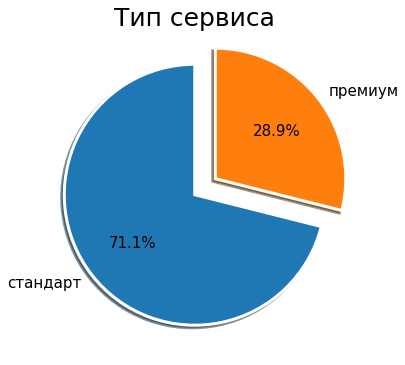

стандарт    924
премиум     376
Name: Тип сервиса, dtype: int64


In [39]:
labels = market_file['Тип сервиса'].value_counts().index.tolist()
sizes = market_file['Тип сервиса'].value_counts().tolist()
explode = [0, 0.2]
textprops = {"fontsize":15}

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Тип сервиса', fontsize=25)
ax.pie(sizes, explode=explode, labels=labels, 
       autopct='%1.1f%%', shadow=True, startangle=90, 
       radius = 1, textprops =textprops, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.show()

print(market_file['Тип сервиса'].value_counts())

__Вывод:__ На сайте преимущественно (71%) пользователи со стандартным сервисом

- __Разрешить сообщать__ — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.

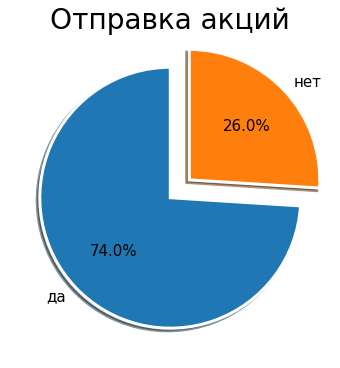

да     962
нет    338
Name: Разрешить сообщать, dtype: int64


In [40]:
labels = market_file['Разрешить сообщать'].value_counts().index.tolist()
sizes = market_file['Разрешить сообщать'].value_counts().tolist()
explode = [0, 0.2]
textprops = {"fontsize":15}

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Отправка акций', fontsize=28)
ax.pie(sizes, explode=explode, labels=labels, 
       autopct='%1.1f%%', shadow=True, startangle=90, 
       radius = 1, textprops =textprops, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.show()

print(market_file['Разрешить сообщать'].value_counts())

__Вывод:__ На сайте преимущественно (74%) пользователи разрешают присылать дополнительные предложения

- __Популярная_категория__ — самая популярная категория товаров у покупателя за последние 6 месяцев.

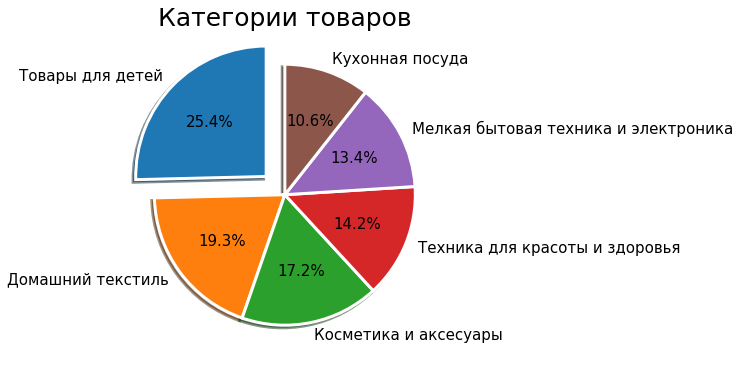

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64


In [41]:
labels = market_file['Популярная_категория'].value_counts().index.tolist()
sizes = market_file['Популярная_категория'].value_counts().tolist()
explode = [0.2, 0, 0, 0, 0, 0]
textprops = {"fontsize":15}

fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Категории товаров', fontsize=25)
ax.pie(sizes, explode=explode, labels=labels, 
       autopct='%1.1f%%', shadow=True, startangle=90, 
       radius = 1, textprops =textprops, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.show()

print(market_file['Популярная_категория'].value_counts())

__Вывод:__ На сайте преимущественно популярны товары для детей, домашний текстиль, косметика и аксесуары. Возможно домохозяйки основные представители среди пользователей.

### Исследование данных таблицы market_money

,Выручка
Период,
предыдущий_месяц,6417996.5
препредыдущий_месяц,6272769.0
текущий_месяц,6909449.1


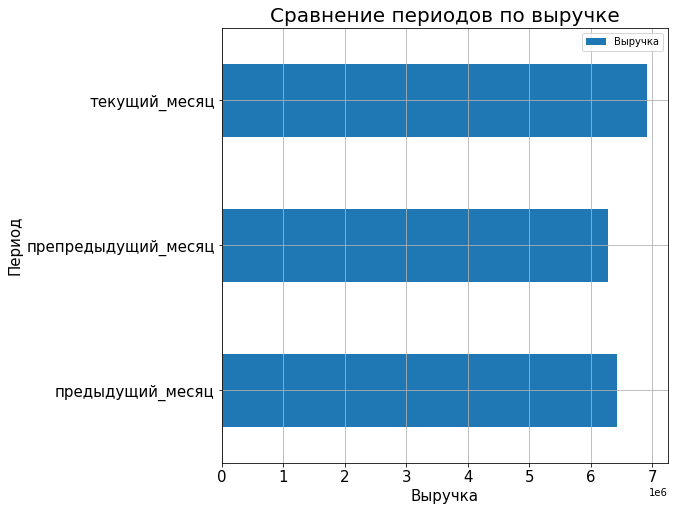

In [42]:
#Описание
display(market_money.groupby(['Период']).sum())

#График
(
    market_money
    .pivot_table(index='Период', values='Выручка', aggfunc='sum')
    .plot(kind ='barh', grid=True, figsize=(8,8), fontsize=15)
) 
plt.title('Сравнение периодов по выручке', fontsize=20)
plt.xlabel('Выручка', fontsize=15)
plt.ylabel('Период', fontsize=15)
plt.legend(loc = 'best')
plt.show()

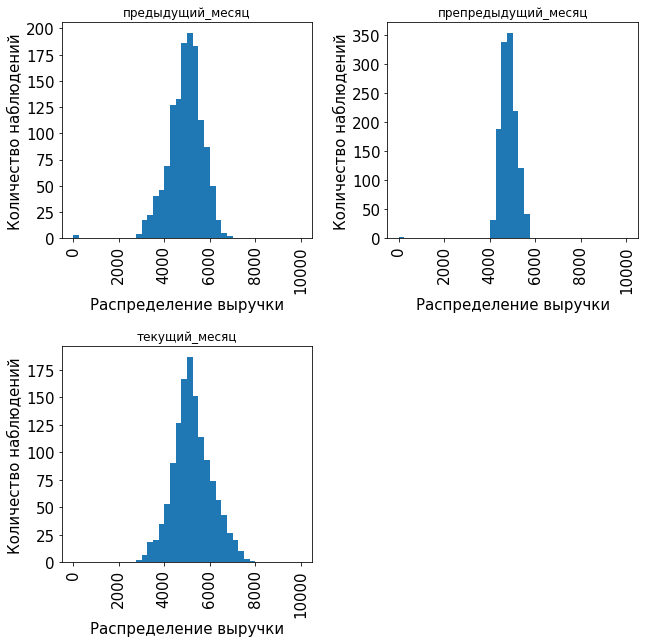

Выручка                                             \
                      count         mean          std     min      25%   
Период                                                                   
предыдущий_месяц     1300.0  4936.920385   739.597997     0.0  4496.75   
препредыдущий_месяц  1300.0  4825.206923   405.979663     0.0  4583.00   
текущий_месяц        1300.0  5314.960846  2939.708156  2758.7  4706.05   

                                                  
                         50%       75%       max  
Период                                            
предыдущий_месяц     5005.00  5405.625    6869.5  
препредыдущий_месяц  4809.00  5053.500    5663.0  
текущий_месяц        5179.95  5761.725  106862.2

In [43]:
axes = market_money.hist(['Выручка'], by='Период',bins=40, layout=(2,2), 
                         figsize=(10,10), range=(0,10000), xlabelsize=15, ylabelsize=15)
for ax in axes.flatten():
    ax.set_xlabel('Распределение выручки', size=15)
    ax.set_ylabel('Количество наблюдений', size=15)

plt.show()

market_money.groupby(['Период']).describe()

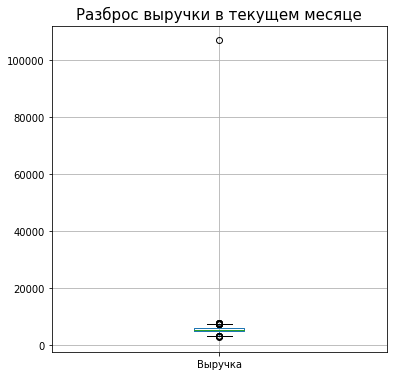

In [44]:
market_money[market_money['Период'] == 'текущий_месяц'].boxplot(figsize=(6,6))
plt.title('Разброс выручки в текущем месяце', fontsize=15)
plt.show()

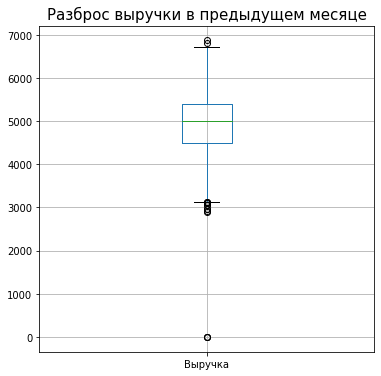

In [45]:
market_money[market_money['Период'] == 'предыдущий_месяц'].boxplot(figsize=(6,6))
plt.title('Разброс выручки в предыдущем месяце', fontsize=15)
plt.show()

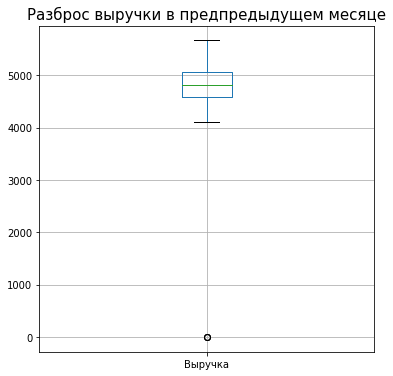

In [46]:
market_money[market_money['Период'] == 'препредыдущий_месяц'].boxplot(figsize=(6,6))
plt.title('Разброс выручки в предпредыдущем месяце', fontsize=15)
plt.show()

__Вывод:__ Больше всего выручки выявлено в текущем месяце, при это наименьший разброс выручки выявлен в предпредыдущем месяце, он же продемонстрировал наименьший объем выручки. В данных наблюдаются выбросы, так в текущем месяце выброс по вырочке равен 106 тысячам.

### Исследование данных таблицы market_time

,минут
Период,
предыдущий_месяц,17508
текущий_месяц,17166


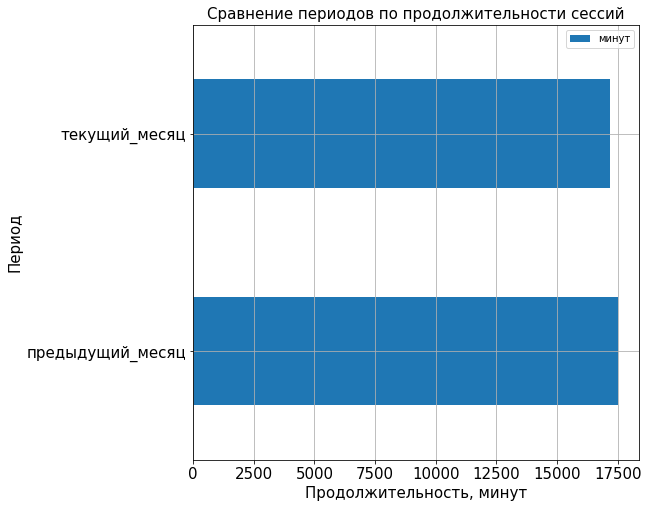

In [47]:
#Описание
display(market_time.groupby(['Период']).sum())

#График
(
    market_time
    .pivot_table(index='Период', values='минут', aggfunc='sum')
    .plot(kind ='barh', grid=True, figsize=(8,8), fontsize=15)
) 
plt.title('Сравнение периодов по продолжительности сессий', fontsize=15)
plt.xlabel('Продолжительность, минут', fontsize=15)
plt.ylabel('Период', fontsize=15)
plt.legend(loc = 'best')
plt.show()

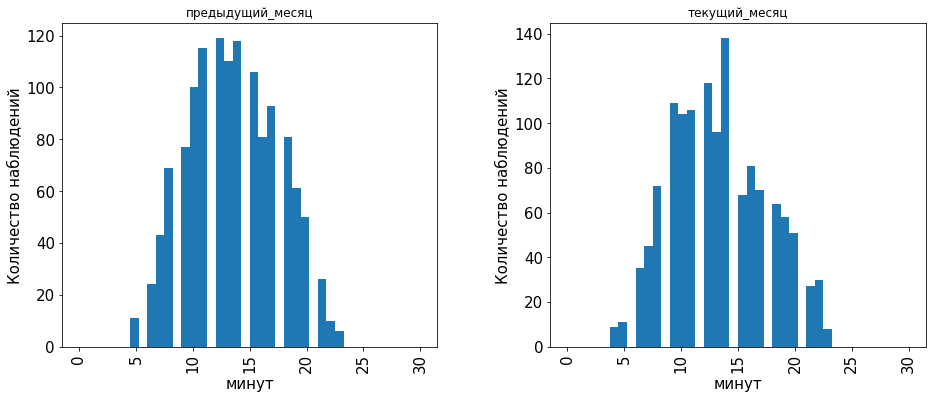

минут                                                  
                   count       mean       std  min   25%   50%   75%   max
Период                                                                    
предыдущий_месяц  1300.0  13.467692  3.932029  5.0  11.0  13.0  17.0  23.0
текущий_месяц     1300.0  13.204615  4.220589  4.0  10.0  13.0  16.0  23.0

In [48]:
axes = market_time.hist(['минут'], by='Период',bins=40, layout=(2,2), 
                        figsize=(15,15), range=(0,30), xlabelsize=15, ylabelsize=15)
for ax in axes.flatten():
    ax.set_xlabel('минут', size=15)
    ax.set_ylabel('Количество наблюдений', size=15)

plt.show()

market_time.groupby(['Период']).describe()

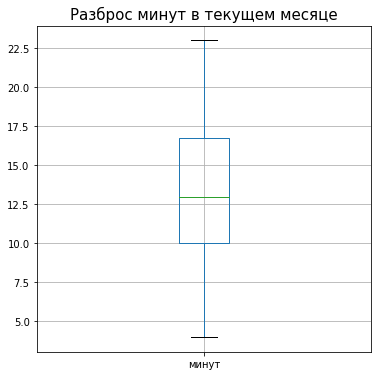

            минут
count  866.000000
mean    13.378753
std      4.159503
min      4.000000
25%     10.000000
50%     13.000000
75%     16.750000
max     23.000000


In [49]:
market_time[market_money['Период'] == 'текущий_месяц'].boxplot(figsize=(6,6))
plt.title('Разброс минут в текущем месяце', fontsize=15)
plt.show()
print(market_time[market_money['Период'] == 'текущий_месяц'].describe())

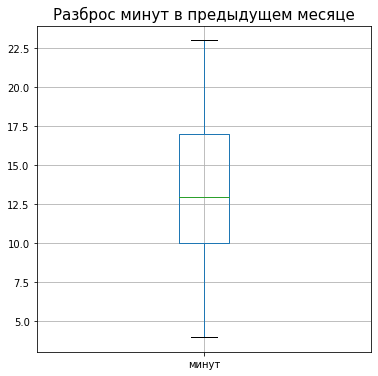

            минут
count  867.000000
mean    13.445213
std      4.022763
min      4.000000
25%     10.000000
50%     13.000000
75%     17.000000
max     23.000000


In [50]:
market_time[market_money['Период'] == 'предыдущий_месяц'].boxplot(figsize=(6,6))
plt.title('Разброс минут в предыдущем месяце', fontsize=15)
plt.show()
print(market_time[market_money['Период'] == 'предыдущий_месяц'].describe())

- __Вывод:__ В целом сессии в текущем и предыдущем месяце схожи по объемам, при этом текущий месяц незначительно отстает по показателям.

### Исследование данных таблицы money

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64


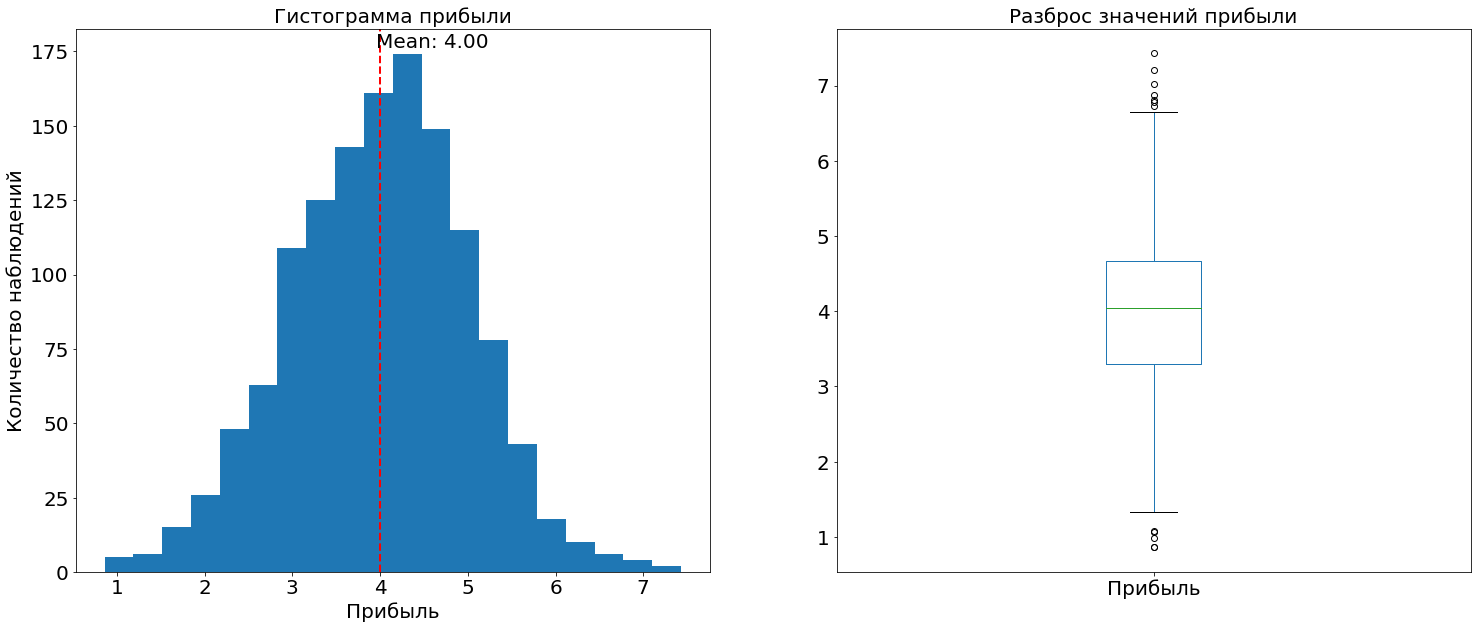

In [51]:
#Описание
print(money['Прибыль'].describe())

#Графики
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
money['Прибыль'].plot(kind='hist', bins = 20, ax=axes[0], fontsize=20)
axes[0].axvline(money['Прибыль'].mean(), color='red', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Прибыль', size=20)
axes[0].set_ylabel('Количество наблюдений', size=20)
axes[0].set_title('Гистограмма прибыли', size=20)

min_ylim, max_ylim = plt.ylim()
axes[0].text(money['Прибыль'].mean()*1.15, max_ylim*178, 
             'Mean: {:.2f}'.format(money['Прибыль'].mean()), 
             fontsize=20, verticalalignment='center', horizontalalignment='center')

money['Прибыль'].plot(kind='box', ax=axes[1], fontsize = 20)
axes[1].set_title('Разброс значений прибыли', size=20)
plt.show()

- __Вывод:__ Среднее значение прибыли равно 4, присутствуют выбросы с максимальным значением - 7.43, минимальным - 0.86

### Итоги раздела

__Итоги исследования данных таблицы market_file__
- Мы наблюдаем, что в среднем пользователи получили 4.25 маркетинговых коммуникаций за 6 месяцев, где показатель менее 2-ух коммуникаций является выбросом статистики, что прослеживается для 36 наблюдений.
- В текущем месяце, в большинстве случаев на одного клиента направлено 4 маркетинговые коммуникации. При этом направлялось от 3 до 5.
- Среднее значение длительности нахождения на сайте после регистрации - 600 дней, при этом лишь менее 25% наблюдений находится на сайте менее года
- Возможно определить границу потребления акционных товаров в размере одной трети покупок. Порядка 1000 наблюдений имеют менее трети акционных покупок в корзине, более трети поряда 277. 
- 3 категории за визит - мода просмотров среди пользователей.
- 2-3 неоплаченных товара в корзине наиболее встречающиеся значения среди пользователей
- Ошибки на сайте нормально распределены, в среднем на пользователя приходится 4 ошибки 
- Средний показатель просмотра страниц за один визит равен 8.
- Наблюдается дисбаланс классов активности пользователей, в выборке больше наблюдений где прежний уровень покупательской активности.
- На сайте преимущественно (71%) пользователи со стандартным сервисом
- На сайте преимущественно (74%) пользователи разрешают присылать дополнительные предложения
- На сайте преимущественно популярны товары для детей, домашний текстиль, косметика и аксесуары. Возможно домохозяйки основные представители среди пользователей.

__Итоги исследования данных таблицы market_money__
- Больше всего выручки выявлено в текущем месяце, при это наименьший разброс выручки выявлен в предпредыдущем месяце, он же продемонстрировал наименьший объем выручки. В данных наблюдаются выбросы, так в текущем месяце выброс по вырочке равен 106 тысячам.

__Итоги исследования данных таблицы market_time__
- В целом сессии в текущем и предыдущем месяце схожи по объемам, при этом текущий месяц незначительно отстает по показателям.

__Итоги исследования данных таблицы money__
- Среднее значение прибыли равно 4, присутствуют выбросы с максимальным значением - 7.43, минимальным - 0.86

## Объединение таблиц 

Объединим таблицы market_file, market_money, market_time. Данные о прибыли из файла money при моделировании не понадобятся. 

Данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода.

### Подготовка к объединению таблицы market_money

In [52]:
#Добавим отдельный столбец с показателем выручки для каждого периода
market_money_piv = market_money.pivot_table(index='id', 
                                            columns='Период', 
                                            values='Выручка', 
                                            aggfunc='max')


market_money_piv = market_money_piv.reset_index().rename_axis(None, axis=1)
market_money_piv = market_money_piv.rename(columns={"предыдущий_месяц":"Выручка__месяц_назад",
                                                    "препредыдущий_месяц":"Выручка_2_месяца_назад", 
                                                    "текущий_месяц":"Выручка_текущий_месяц"})

market_money_piv.head(5)

,id,Выручка__месяц_назад,Выручка_2_месяца_назад,Выручка_текущий_месяц
0,215348,0.0,0.0,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5


### Подготовка к объединению таблицы market_time

In [53]:
#Добавим отдельный столбец с показателем выручки для каждого периода
market_time_piv = market_time.pivot_table(index='id', 
                                            columns='Период', 
                                            values='минут', 
                                            aggfunc='max')


market_time_piv = market_time_piv.reset_index().rename_axis(None, axis=1)
market_time_piv = market_time_piv.rename(columns={"предыдущий_месяц":"Минут_предыдущий_месяц",
                                                  "текущий_месяц":"Минут_текущий_месяц"})

market_time_piv.head(5)

,id,Минут_предыдущий_месяц,Минут_текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


### Объединение таблиц

In [54]:
#Проверим сходство количества строк
print(market_file.shape)
print(market_money_piv.shape)
print(market_time_piv.shape)

(1300, 13)
(1300, 4)
(1300, 3)


In [55]:
#Объединим файл market_file с market_money
market_part = market_file.merge(market_money_piv, on='id', how='left')

#Присоединяем к полученному файлу market_time
df = market_part.merge(market_time_piv, on='id', how='left')

#Убираем из списка клиентов, у которых отсутствует активность за три месяца
df = df[df['Выручка_2_месяца_назад'] != 0]
df = df[df['Выручка__месяц_назад'] != 0]
df = df[df['Выручка_текущий_месяц'] != 0]
df.head(5)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка__месяц_назад,Выручка_2_месяца_назад,Выручка_текущий_месяц,Минут_предыдущий_месяц,Минут_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   object 
 1   Покупательская активность            1297 non-null   object 
 2   Тип сервиса                          1297 non-null   object 
 3   Разрешить сообщать                   1297 non-null   object 
 4   Маркет_актив_6_мес                   1297 non-null   float64
 5   Маркет_актив_тек_мес                 1297 non-null   int64  
 6   Длительность                         1297 non-null   int64  
 7   Акционные_покупки                    1297 non-null   float64
 8   Популярная_категория                 1297 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  Ошибка_сервиса                

## Корреляционный анализ 

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка__месяц_назад', 'Выручка_2_месяца_назад', 'Выручка_текущий_месяц', 'Минут_предыдущий_месяц', 'Минут_текущий_месяц']


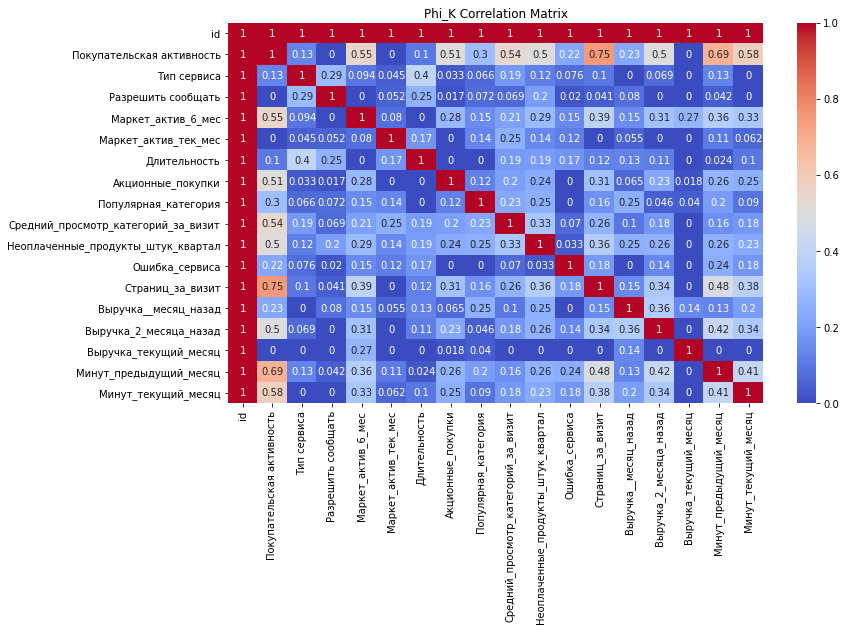

In [57]:
# Вычисление матрицы корреляции с использованием phik
corr_matrix = df.phik_matrix()

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

__Выводы по анализу корреляции:__
- Покупательская активность имеет сильную корреляцию с числом просмотренных страниц за виизит, минут за предыдущий месяц.
- Акционные покупки имеют корреляцию с выручкой за предпредыдущий месяц
- Выручка за предыдущий месяц коррелирует с выручкой за предпредыдущий месяц
- Мультиколлинеарность между признаками не наблюдается 

## Использование пайплайнов

__В связи с тем, что решается задача классификации, будут подобраны параметры для четырех моделей классификации:__
- KNeighborsClassifier(), 
- DecisionTreeClassifier(), 
- LogisticRegression() 
- SVC()

В качестве метрики для оценки качества моделей будет использоваться roc-auc

In [58]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

### Подготовка данных

In [59]:
X = df.drop(['Покупательская активность', 'id'], axis=1)
y = df['Покупательская активность']
y = y.replace({'Снизилась':1, 'Прежний уровень':0})

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

X_train.shape, X_test.shape

((972, 16), (325, 16))

In [60]:
ohe_columns = X_train.select_dtypes(exclude='number').columns.tolist()
num_columns = X_train.select_dtypes(exclude='object').columns.tolist()

In [61]:
print(ohe_columns)

['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']


In [62]:
print(num_columns)

['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка__месяц_назад', 'Выручка_2_месяца_назад', 'Выручка_текущий_месяц', 'Минут_предыдущий_месяц', 'Минут_текущий_месяц']


### Подготовка пайплайна 

В связи с тем, что решается задача классификации, а также присутствует дисбаланс классов, для сравнения моделей мы воспользуемся метрикой ROC_AUC. 

In [63]:
# создаём пайплайн для подготовки признаков из списка ohe_columns
ohe_pipe = Pipeline(
    [
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
    )

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [64]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])


#словарь гиперпараметров моделей
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1,6),
        'models__max_features': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='saga', 
            penalty='l1'
        )],
        'models__C': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
     # словарь для модели SVC()
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            kernel = 'linear', 
            probability=True
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
    
]

grid = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

### Определение лучшей модели

In [65]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         ['Тип '
                                                                          'сервиса',
                                                                          'Разрешить '
                                                                          'сообщать',
                                                                          'Популярная_категория']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['Маркет_актив_6_мес',
                                                                          'Маркет_актив_тек_мес',
                                                                          'Длительность',
                                                                          'Акционные_поку...
                         {'models': [LogisticRegression(C=1, penalty='l1',
                                                        random_state=42,
                                                        solver='saga')],
                          'models__C': range(1, 6),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']},
                         {'models': [SVC(kernel='linear', probability=True,
                                         random_state=42)],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

In [66]:
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', grid.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Тип сервиса',
                                                   'Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('num', MinMaxScaler(),
                                                  ['Маркет_актив_6_мес',
                                                   'Маркет_актив_тек_мес',
                                                   'Длительность',
                                              

In [67]:
pd.set_option('display.max_colwidth', None)

result = pd.DataFrame(grid.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')) 

,rank_test_score,param_models,mean_test_score,params
121,1,"LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga')",0.899237,"{'models': LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga'), 'models__C': 1, 'preprocessor__num': MinMaxScaler()}"
125,2,"LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga')",0.898609,"{'models': LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga'), 'models__C': 2, 'preprocessor__num': MinMaxScaler()}"
120,3,"LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga')",0.896300,"{'models': LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga'), 'models__C': 1, 'preprocessor__num': StandardScaler()}"
137,4,"LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga')",0.895896,"{'models': LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga'), 'models__C': 5, 'preprocessor__num': MinMaxScaler()}"
124,5,"LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga')",0.895893,"{'models': LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga'), 'models__C': 2, 'preprocessor__num': StandardScaler()}"
...,...,...,...,...
0,137,DecisionTreeClassifier(random_state=42),0.481469,"{'models': DecisionTreeClassifier(random_state=42), 'models__max_depth': 1, 'models__max_features': 1, 'preprocessor__num': StandardScaler()}"
7,141,DecisionTreeClassifier(random_state=42),0.457140,"{'models': DecisionTreeClassifier(random_state=42), 'models__max_depth': 1, 'models__max_features': 2, 'preprocessor__num': 'passthrough'}"
6,141,DecisionTreeClassifier(random_state=42),0.457140,"{'models': DecisionTreeClassifier(random_state=42), 'models__max_depth': 1, 'models__max_features': 2, 'preprocessor__num': RobustScaler()}"
5,141,DecisionTreeClassifier(random_state=42),0.457140,"{'models': DecisionTreeClassifier(random_state=42), 'models__max_depth': 1, 'models__max_features': 2, 'preprocessor__num': MinMaxScaler()}"


Логистическая модель с масштабированием при помощи RobustScaler оказалась наиболее эффективной. 

### Применение лучшей модели для прогноза


In [68]:
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)[:,1]

In [69]:
print('ROC_AUC:', roc_auc_score(y_test, y_prob))
print('Accuracy:', accuracy_score(y_test, y_pred))

ROC_AUC: 0.9250922805328198
Accuracy: 0.9015384615384615


### Выводы раздела

- В связи с тем, что решается задача классификации, а также присутствует дисбаланс классов (в нашем случае модель может лучше распознавать класс 0), для сравнения качества моделей мы воспользуемся метрикой ROC_AUC.
- В связи с тем, что решается задача классификации, подобраны параметры для четырех моделей классификации: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC(), оценка моделей осуществлялась через метрику ROC-AUC
- Логистическая модель с масштабированием при помощи MinMaxScaler оказалась наиболее эффективной, с уровнем ROC-AUC 0.899.
- На тестовой выборке модель показала уровень 0.925

## Анализ важности признаков

### Применение shap для анализа важности признаков

In [70]:
print(X_train.columns.tolist())

['Тип сервиса', 'Разрешить сообщать', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Популярная_категория', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка__месяц_назад', 'Выручка_2_месяца_назад', 'Выручка_текущий_месяц', 'Минут_предыдущий_месяц', 'Минут_текущий_месяц']


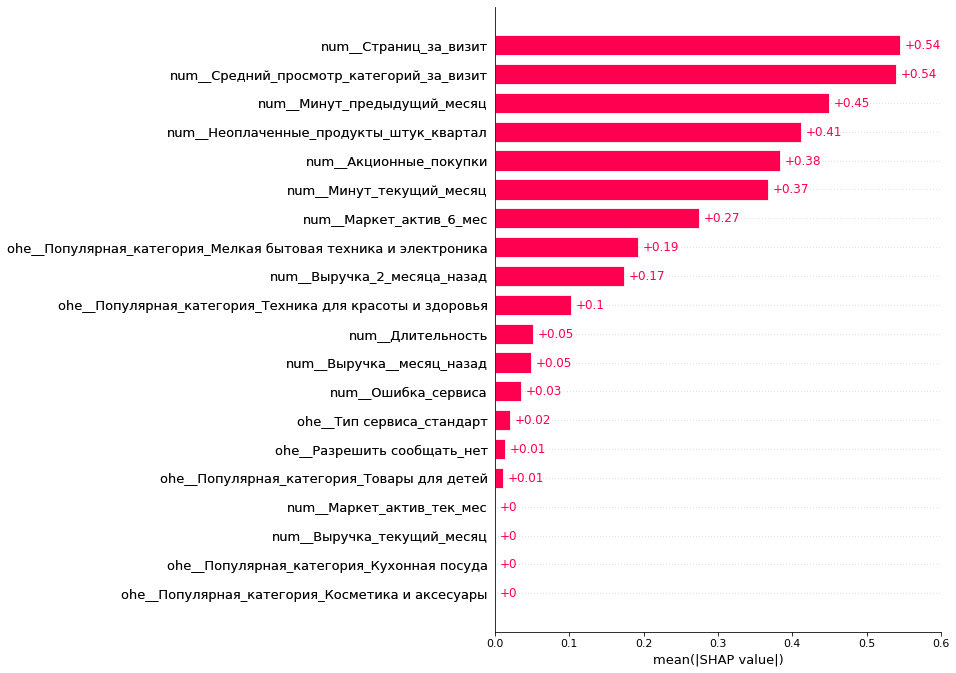

In [71]:
#Предподготовка данных для обучения
X_train_prep = pipe_final.named_steps['preprocessor'].fit_transform(X_train)

#Инициализация explainer
explainer = shap.LinearExplainer(grid.best_estimator_.named_steps['models'], X_train_prep)

#Предподготовка данных для теста
X_test_prep = pipe_final.named_steps['preprocessor'].transform(X_test)

#Получаем имена признаков
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

#Применяе
X_test_prep = pd.DataFrame(X_test_prep, columns=feature_names)


shap_values = explainer(X_test_prep)
shap.plots.bar(shap_values, max_display=30) 

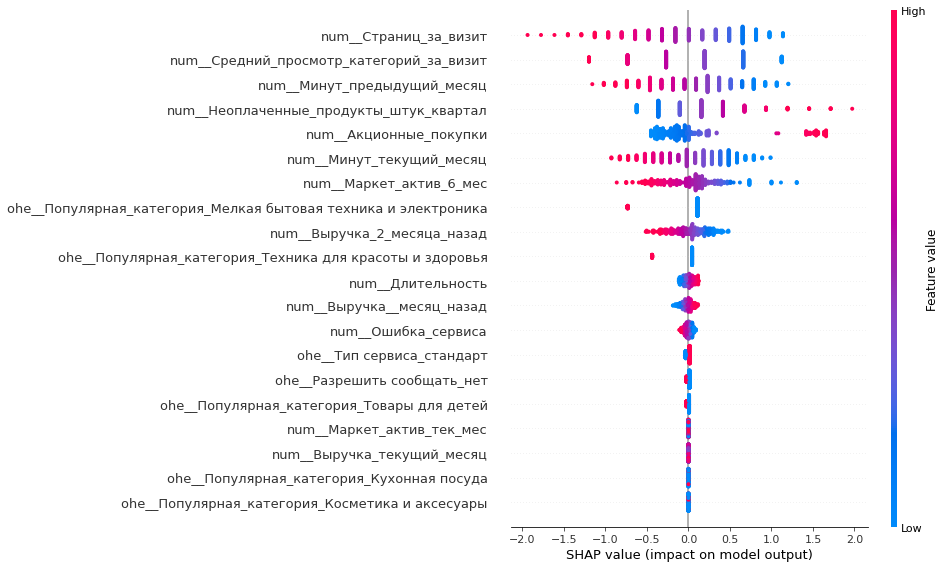

In [72]:
shap.plots.beeswarm(shap_values, max_display=30)

### Выводы раздела

__Влияние факторов в модели:__
- Показатель просмотра страниц за визит наиболее значим для модели
- Уменьшение количества просмотренных категорий за визит ведет к прогнозированию моделью снижения активности клиента
- Снижение продолжительности пользовательской активности за прошлый и текущий месяц повышает вероятность прогноза о снижении финансовой активности
- Согласно модели, наличие неоплаченных продуктов повышает вероятность того, что клиент в дальнейшем снизит активность
- Приобритение акционных покупок, согласно модели, свидетельствует о снижении финансовой активности клиентов
- Пользователи у которых среднемесячное значение маркетинговых коммуникаций за 6 месяцев меньше, более вероятно окажутся в списке с пониженной активностью
- Остальные признаки менее важны для модели


## Сегментация покупателей

__Сегментация будет проведена по прибыльности клиентов и вероятности уменьшения их активности__


### Сегментация 

In [73]:
#Получим вероятности снижения покупательской активности
proba = grid.predict_proba(X)
prob_frame = pd.DataFrame(proba)

In [74]:
#Составим таблицу для сегментации 
segment_df = prob_frame.drop(0, axis=1)
segment_df = segment_df.rename(columns={1:'Вероятность_снижения_активности'})
segment_df = segment_df.join(df)
segment_df = segment_df.merge(money, on='id')

In [75]:
#Выделим среднюю прибыль для сегментации клиентов по показателю прибыли
mean_profit = segment_df['Прибыль'].mean()
mean_profit

3.998686244204018

__Выделим следующие сегменты:__
- __Сегмент 1__: Прибыль больше средней и вероятность снижения активности больше 0.8
- __Сегмент 2__: Прибыль больше средней и вероятность снижения активности между 0.2 и 0.8
- __Сегмент 3__: Прибыль больше средней и вероятность снижения активности менее 0.2
- __Сегмент 4__: Прибыль меньше средней и вероятность снижения активности больше 0.8
- __Сегмент 5__: Прибыль меньше средней и вероятность снижения активности между 0.2 и 0.8
- __Сегмент 6__: Прибыль меньше средней и вероятность снижения активности менее 0.2

In [97]:
#Функция для категоризации сегментов по вероятности снижения активности и прибыльности
def categorize(row):
    try:
        if row['Прибыль'] > mean_profit and row['Вероятность_снижения_активности'] > 0.8:
            return 'Сегмент 1_Высокая_вероятность'
        elif row['Прибыль'] > mean_profit and 0.2 <= row['Вероятность_снижения_активности'] <= 0.8:
            return 'Сегмент 2'
        elif row['Прибыль'] > mean_profit and row['Вероятность_снижения_активности'] < 0.2:
            return 'Сегмент 3'
        elif row['Прибыль'] <= mean_profit and row['Вероятность_снижения_активности'] > 0.8:
            return 'Сегмент 4_Высокая_вероятность'
        elif row['Прибыль'] <= mean_profit and 0.2 <= row['Вероятность_снижения_активности'] <= 0.8:
            return 'Сегмент 5'
        elif row['Прибыль'] <= mean_profit and row['Вероятность_снижения_активности'] < 0.2:
            return 'Сегмент 6'  
    except:
        pass

In [98]:
segment_df['Сегмент'] = segment_df.apply(categorize, axis=1)

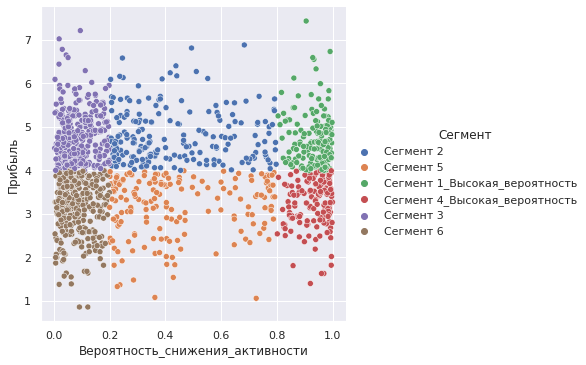

In [99]:
sns.relplot(
    data=segment_df, x="Вероятность_снижения_активности", y="Прибыль",
    hue="Сегмент", kind="scatter"
)
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

### Рекомендации по сегменту

__Наиболее приоритетным сегментом для анализа является группа прибыльных клиентов, у которых существует вероятность снижения активности (Прибыльный_клиент_на_удержание)__

- Данный сегмент пользователей, наравне с сегментом прибыльных_клиентов наибольшую финансовую выгоду
- Снижение активности данных клиентов приведет к более значительному снижению финансового результата, а значит важно удержать их в первую очередь

Сегмент
Сегмент 1_Высокая_вероятность    3.557233
Сегмент 2                        4.276119
Сегмент 3                        4.559677
Сегмент 4_Высокая_вероятность    3.513475
Сегмент 5                        4.353143
Сегмент 6                        4.570779
Name: mean, dtype: float64

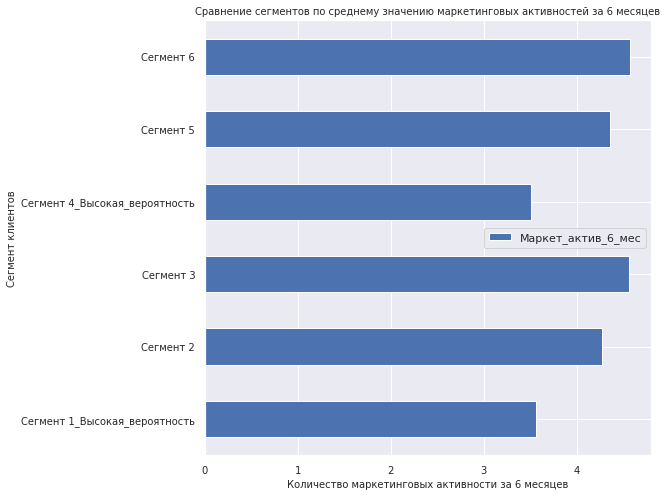

In [107]:
#Описание
display(segment_df.groupby(['Сегмент'])['Маркет_актив_6_мес'].describe()['mean'])

#График
(
    segment_df
    .pivot_table(index='Сегмент', values='Маркет_актив_6_мес', aggfunc='mean')
    .plot(kind ='barh', grid=True, figsize=(8,8), fontsize=10)
) 
plt.title('Сравнение сегментов по среднему значению маркетинговых активностей за 6 месяцев', fontsize=10)
plt.xlabel('Количество маркетинговых активности за 6 месяцев', fontsize=10)
plt.ylabel('Сегмент клиентов', fontsize=10)
plt.legend(loc = 'best')
plt.show()

- Показатель средней маркетинговой активности на протяжении 6 месяцев, для сегментов 1 и 4 (где высокая вероятость снижения активности), меньше чем у пользователей, где вероятность снижения активности меньше. Поэтому ключевой рекомендацией является, обращение внимания отделом маркетинга на пользователей из приоритетного сегмента. 

In [101]:
segment_df[segment_df['Сегмент'] == 'Сегмент 1_Высокая_вероятность']['Тип сервиса'].value_counts()

стандарт    105
премиум      54
Name: Тип сервиса, dtype: int64

- Учитывая, что премиальная подписка присутствует среди данного сегмента пользователей, возможно стоит попробовать улучшить услуги прилагаемые к данному типу сервиса. Помимо прочего, возможно стоит направить бесплатные пробные периоды. 

Сегмент
Сегмент 1_Высокая_вероятность    4.056604
Сегмент 2                        2.547264
Сегмент 3                        2.361290
Сегмент 4_Высокая_вероятность    4.056738
Сегмент 5                        2.902857
Сегмент 6                        2.292208
Name: mean, dtype: float64

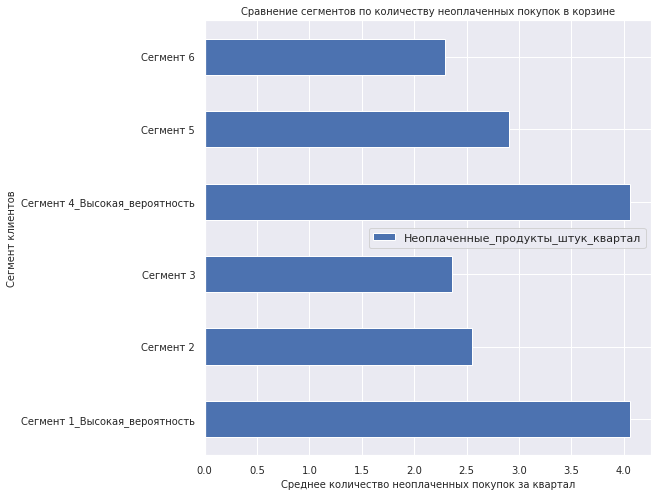

In [106]:
#Описание
display(segment_df.groupby(['Сегмент'])['Неоплаченные_продукты_штук_квартал'].describe()['mean'])

#График
(
    segment_df
    .pivot_table(index='Сегмент', values='Неоплаченные_продукты_штук_квартал', aggfunc='mean')
    .plot(kind ='barh', grid=True, figsize=(8,8), fontsize=10)
) 
plt.title('Сравнение сегментов по количеству неоплаченных покупок в корзине', fontsize=10)
plt.xlabel('Среднее количество неоплаченных покупок за квартал', fontsize=10)
plt.ylabel('Сегмент клиентов', fontsize=10)
plt.legend(loc = 'best')
plt.show()

- Наблюдаем, что присутствует много неоплаченных покупок у клиентов из сегментов на удержание. Возможно им стоит направить скидочные промокоды/напоминания, чтоб они завершили свои покупки. 

## Общий вывод

### Бизнес окружение и задача

- Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. 
- Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться
- Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории.


__Задача:__

- Отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

- Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

- Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
- В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
- Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения

### Результаты работы:

__Изучение файлов и предподготовка__
- Загружены четыре таблицы. 
- Проведена проверка на дубликаты, неявные дубликаты и отсутствующие данные. 
- Исправлены опечатки в категорийных данных
- Изменен тип данных идентификаторов на object

__Итоги исследования данных таблицы market_file__
- Мы наблюдаем, что в среднем пользователи получили 4.25 маркетинговых коммуникаций за 6 месяцев, где показатель менее 2-ух коммуникаций является выбросом статистики, что прослеживается для 36 наблюдений.
- В текущем месяце, в большинстве случаев на одного клиента направлено 4 маркетинговые коммуникации. При этом направлялось от 3 до 5.
- Среднее значение длительности нахождения на сайте после регистрации - 600 дней, при этом лишь менее 25% наблюдений находится на сайте менее года
- Возможно определить границу потребления акционных товаров в размере одной трети покупок. Порядка 1000 наблюдений имеют менее трети акционных покупок в корзине, более трети поряда 277. 
- 3 категории за визит - мода просмотров среди пользователей.
- 2-3 неоплаченных товара в корзине наиболее встречающиеся значения среди пользователей
- Ошибки на сайте нормально распределены, в среднем на пользователя приходится 4 ошибки 
- Средний показатель просмотра страниц за один визит равен 8.
- Наблюдается дисбаланс классов активности пользователей, в выборке больше наблюдений где прежний уровень покупательской активности.
- На сайте преимущественно (71%) пользователи со стандартным сервисом
- На сайте преимущественно (74%) пользователи разрешают присылать дополнительные предложения
- На сайте преимущественно популярны товары для детей, домашний текстиль, косметика и аксесуары. Возможно домохозяйки основные представители среди пользователей.

__Итоги исследования данных таблицы market_money__
- Больше всего выручки выявлено в текущем месяце, при это наименьший разброс выручки выявлен в предпредыдущем месяце, он же продемонстрировал наименьший объем выручки. В данных наблюдаются выбросы, так в текущем месяце выброс по вырочке равен 106 тысячам.

__Итоги исследования данных таблицы market_time__
- В целом сессии в текущем и предыдущем месяце схожи по объемам, при этом текущий месяц незначительно отстает по показателям.

__Итоги исследования данных таблицы money__
- Среднее значение прибыли равно 4, присутствуют выбросы с максимальным значением - 7.43, минимальным - 0.86


__Выводы по анализу корреляции:__
- Покупательская активность имеет сильную корреляцию с числом просмотренных страниц за виизит, минут за предыдущий месяц.
- Акционные покупки имеют корреляцию с выручкой за предпредыдущий месяц
- Выручка за предыдущий месяц коррелирует с выручкой за предпредыдущий месяц

__Выводы по моделированию:__
- В связи с тем, что решается задача классификации, а также присутствует дисбаланс классов (в нашем случае модель может лучше распознавать класс 0), для сравнения качества моделей мы воспользуемся метрикой ROC_AUC.
- В связи с тем, что решается задача классификации, подобраны параметры для четырех моделей классификации: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC(), оценка моделей осуществлялась через метрику ROC-AUC
- Логистическая модель с масштабированием при помощи MinMaxScaler оказалась наиболее эффективной, с уровнем ROC-AUC 0.899.
- На тестовой выборке модель показала уровень 0.925

__Влияние факторов в модели:__
- Показатель просмотра страниц за визит наиболее значим для модели
- Уменьшение количества просмотренных категорий за визит ведет к прогнозированию моделью снижения активности клиента
- Снижение продолжительности пользовательской активности за прошлый и текущий месяц повышает вероятность прогноза о снижении финансовой активности
- Согласно модели, наличие неоплаченных продуктов повышает вероятность того, что клиент в дальнейшем снизит активность
- Приобритение акционных покупок, согласно модели, свидетельствует о снижении финансовой активности клиентов
- Пользователи у которых среднемесячное значение маркетинговых коммуникаций за 6 месяцев меньше, более вероятно окажутся в списке с пониженной активностью
- Остальные признаки менее важны для модели

__Итоги сегментации:__

__Наиболее приоритетным сегментом для анализа является группа прибыльных клиентов, у которых существует вероятность снижения активности (Прибыльный_клиент_на_удержание)__
- Данный сегмент пользователей, наравне с сегментом прибыльных клиентов наибольшую финансовую выгоду
- Снижение активности данных клиентов приведет к более значительному снижению финансового результата, а значит важно удержать их в первую очередь
- Показатель средней маркетинговой активности на протяжении 6 месяцев, для сегментов где требуется удержание, меньше чем у пользователей, где значение вероятность снижения активности меньше. Поэтому ключевой рекомендацией является, обращение внимания отделом маркетинга на пользователей из приоритетного сегмента. 
- Учитывая, что премиальная подписка присутствует среди данного сегмента пользователей, возможно стоит попробовать улучшить услуги прилагаемые к данному типу сервиса. Помимо прочего, возможно стоит направить бесплатные пробные периоды.
- Наблюдаем, что присутствует много неоплаченных покупок у клиентов из сегментов на удержание. Возможно им стоит направить скидочные промокоды, чтоб они завершили свои покупки.